In [1]:
# install opendataset to downloads dataset from kaggle
!pip install opendatasets librosa seaborn tensorflow_io soundfile

In [2]:
# https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

import opendatasets as od

dataset_url = "https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification"
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  kristianrhyuben


Your Kaggle Key:

  ································


Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification


100%|██████████| 1.21G/1.21G [00:07<00:00, 182MB/s] 


In [3]:
import librosa
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

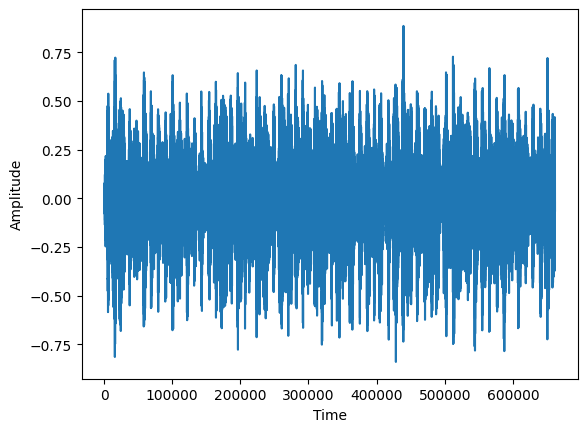

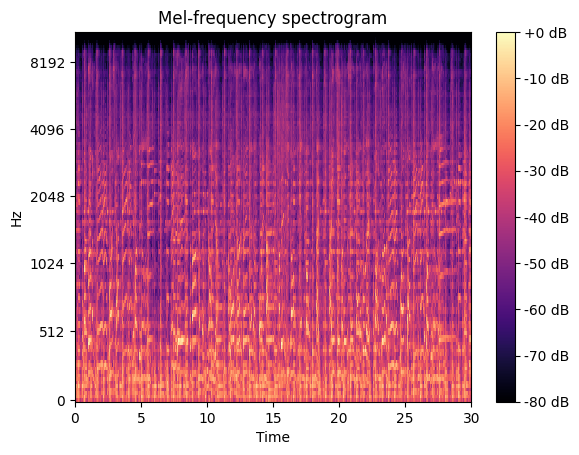

In [4]:
audio_path = 'gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav'

y, sr = librosa.load(audio_path, sr=None)

plt.plot(y)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
spectrogram_tensor = tf.convert_to_tensor(spectrogram_db, dtype=tf.float32)
spectrogram_tensor = tf.expand_dims(spectrogram_tensor, axis=0)
spectrogram_tensor

fig, ax = plt.subplots()
img = librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', ax=ax, sr=sr)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()


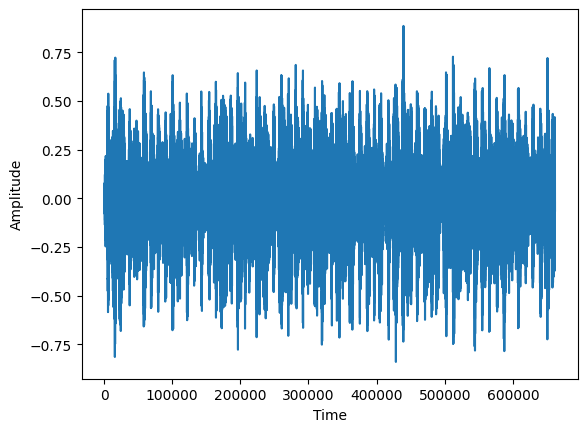

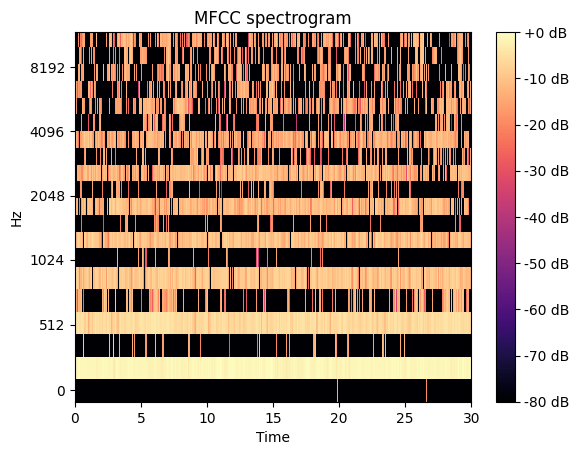

In [5]:
audio_path = 'gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav'

y, sr = librosa.load(audio_path, sr=None)

plt.plot(y)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

spectrogram = librosa.feature.mfcc(y=y, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
spectrogram_tensor = tf.convert_to_tensor(spectrogram_db, dtype=tf.float32)
spectrogram_tensor = tf.expand_dims(spectrogram_tensor, axis=0)
spectrogram_tensor

fig, ax = plt.subplots()
img = librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', ax=ax, sr=sr)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='MFCC spectrogram')
plt.show()


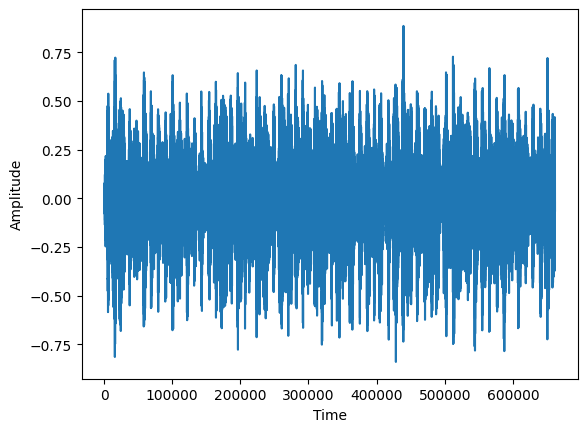

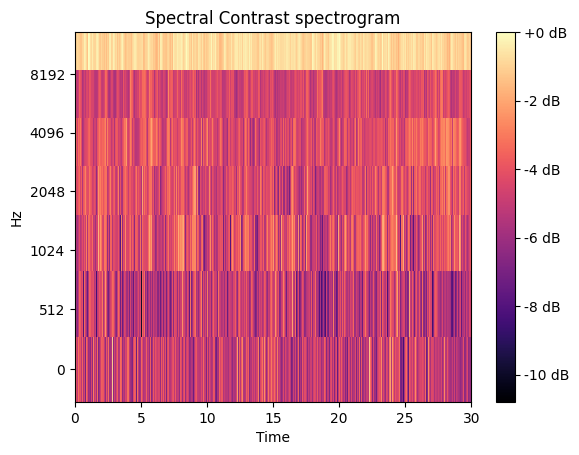

TensorShape([7, 1293, 1])

In [6]:
audio_path = 'gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav'

y, sr = librosa.load(audio_path, sr=None)

plt.plot(y)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

spectrogram = librosa.feature.spectral_contrast(y=y, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
spectrogram_tensor = tf.convert_to_tensor(spectrogram_db, dtype=tf.float32)
spectrogram_tensor = tf.expand_dims(spectrogram_tensor, axis=-1)

fig, ax = plt.subplots()
img = librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', ax=ax, sr=sr)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Spectral Contrast spectrogram')
plt.show()

spectrogram_tensor.shape


In [176]:
import math
import json
import os

SR = 22050
TD = 30
SPT = SR * TD

def save_spectrogram(path, json_path, n_fft=2048, hop_length=512, num_segments=3):
  sample_per_segment = int(SPT / num_segments)
  num_spectrogram_per_segment = math.ceil(sample_per_segment / hop_length)

  for label in os.listdir(path):
    data = {
        "labels": [],
        "spectrogram": []
    }

    class_folder = os.path.join(path, label)
    if not os.path.isdir(class_folder):
      continue
    for file_name in os.listdir(class_folder):
      if file_name.endswith('.wav'):
        try:
          signal, sr = librosa.load(os.path.join(class_folder, file_name))

          for d in range(num_segments):
            start = sample_per_segment * d
            finish = start + sample_per_segment

            spectrogram = librosa.feature.mfcc(y=signal[start:finish], sr=sr, n_mfcc=13, n_fft=n_fft, hop_length=hop_length)
            spectrogram_db = spectrogram.T
            if len(spectrogram_db) == num_spectrogram_per_segment:
              data["spectrogram"].append(spectrogram.tolist())
              data["labels"].append(label)
        except Exception as e:
          print(e)
          continue
    print(f"Success load audio {label}")
    with open(f"json_path_{label}.json", "w") as fp:
      json.dump(data, fp, indent=4)

save_spectrogram('gtzan-dataset-music-genre-classification/Data/genres_original', './music_genre')


Success load audio rock
Success load audio pop
Success load audio blues
Success load audio reggae
Success load audio hiphop
Success load audio disco
Success load audio metal
Success load audio country
Success load audio classical


/tmp/ipykernel_30/757525954.py:25: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(os.path.join(class_folder, file_name))
/opt/conda/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)



Success load audio jazz


In [177]:
DATA_PATH = "./json_path_blues.json"

def load_dataset(data_path):

    with open(data_path,"r") as fp:
        data = json.load(fp)

    X = np.array(data["spectrogram"])
    y = np.array(data["labels"])
    return X , y

X, y = load_dataset(DATA_PATH)

In [178]:
X.shape

(300, 13, 431)

In [180]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.2)
X_test.shape
y_train

array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blu

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

map_labels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

def fetch_dataset(genre):
  with open(f"json_path_{genre}.json", "r") as f:
    data =  json.load(f)

  return data['spectrogram'], data['labels']

def create_dataset():
  X = []
  y = []

  for map in map_labels:
    inputs, targets = fetch_dataset(map)
    X = X + inputs
    y = y + targets

  X = np.array(X)
  y = np.array(y)

  label_encoder = LabelEncoder()
  encoded_labels = label_encoder.fit_transform(y)

  input_train, input_val, target_train, target_val = train_test_split(X, encoded_labels, test_size=0.2)
  input_train, input_test, target_train, target_test = train_test_split(input_train, target_train, test_size=0.1)

  input_train = input_train[..., np.newaxis]
  input_test = input_test[..., np.newaxis]
  input_val = input_val[..., np.newaxis]
  return input_train, input_test, input_val, target_train, target_test, target_val

input_train, input_test, input_val, target_train, target_test, target_val = create_dataset()


In [183]:
input_shape = (input_train.shape[1], input_train.shape[2], input_train.shape[3])
input_shape

(13, 431, 1)

In [184]:
def model_cnn(input_shape, num_classes):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=input_shape),
    tf.keras.layers.PReLU(),
    tf.keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.PReLU(),
    tf.keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (2, 2)),
    tf.keras.layers.PReLU(),
    tf.keras.layers.MaxPooling2D((2,2),strides=(2,2),padding='same'),
    tf.keras.layers.Conv2D(16, (1, 1)),
    tf.keras.layers.PReLU(),
    tf.keras.layers.MaxPooling2D((1,1),strides=(2,2),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
  ])

  optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

cnn_model = model_cnn(input_shape, 10)

cnn_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_88 (Conv2D)              │ (None, 11, 429, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_62 (PReLU)              │ (None, 11, 429, 64)    │       302,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_88 (MaxPooling2D) │ (None, 6, 215, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 6, 215, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 6, 215, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 4, 213, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_63 (PReLU)              │ (None, 4, 213, 32)     │        27,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_89 (MaxPooling2D) │ (None, 2, 107, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 2, 107, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 1, 106, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_64 (PReLU)              │ (None, 1, 106, 32)     │         3,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_90 (MaxPooling2D) │ (None, 1, 53, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 1, 53, 16)      │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_65 (PReLU)              │ (None, 1, 53, 16)      │           848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_91 (MaxPooling2D) │ (None, 1, 27, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 1, 27, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 432)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 64)             │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_66 (PReLU)              │ (None, 64)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_67 (PReLU)              │ (None, 128)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 395,242 (1.51 MB)

 Trainable params: 395,018 (1.51 MB)

 Non-trainable params: 224 (896.00 B)

In [185]:
history = cnn_model.fit(input_train, target_train, epochs=100, batch_size=32, validation_data=(input_val, target_val))


Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.1135 - loss: 2.4868 - val_accuracy: 0.1235 - val_loss: 2.2870
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1859 - loss: 2.2291 - val_accuracy: 0.2621 - val_loss: 2.0656
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2712 - loss: 2.0490 - val_accuracy: 0.3339 - val_loss: 1.8932
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3150 - loss: 1.9300 - val_accuracy: 0.3623 - val_loss: 1.7837
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3511 - loss: 1.8057 - val_accuracy: 0.3973 - val_loss: 1.6844
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4065 - loss: 1.6638 - val_accuracy: 0.4257 - val_loss: 1.6019
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4137 - loss: 1.6090 - val_accuracy: 0.4474 - val_loss: 1.5312
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4158 - loss: 1.5737 - val_accuracy: 0.4524 

In [186]:
test_error, test_accuracy = cnn_model.evaluate(input_test, target_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.6126 - loss: 1.2311
Test accuracy: 0.6416666507720947


In [131]:
save_spectrogram('gtzan-dataset-music-genre-classification/Data/genres_original', './music_genre', n_fft=2048, hop_length=512, num_segments=10)

Success load audio rock
Success load audio pop
Success load audio blues
Success load audio reggae
Success load audio hiphop
Success load audio disco
Success load audio metal
Success load audio country
Success load audio classical


/tmp/ipykernel_30/501844489.py:25: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(os.path.join(class_folder, file_name))
/opt/conda/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)



Success load audio jazz


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

map_labels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

def fetch_dataset(genre):
  with open(f"json_path_{genre}.json", "r") as f:
    data =  json.load(f)

  return data['spectrogram'], data['labels']

def create_dataset():
  X = []
  y = []

  for map in map_labels:
    inputs, targets = fetch_dataset(map)
    X = X + inputs
    y = y + targets

  X = np.array(X)
  y = np.array(y)

  label_encoder = LabelEncoder()
  encoded_labels = label_encoder.fit_transform(y)

  input_train, input_val, target_train, target_val = train_test_split(X, encoded_labels, test_size=0.2)
  input_train, input_test, target_train, target_test = train_test_split(input_train, target_train, test_size=0.1)

  return input_train, input_test, input_val, target_train, target_test, target_val

input_train, input_test, input_val, target_train, target_test, target_val = create_dataset()
input_train.shape

(7189, 20, 130)

In [133]:
input_shape = (input_train.shape[1], input_train.shape[2])
input_shape

(20, 130)

In [138]:
def model_rnn(input_shape, num_classes):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
    model.add(tf.keras.layers.LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
    model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

model = model_rnn(input_shape, 10)

model.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                  │ (None, 20, 128)        │       132,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,546 (599.79 KB)

 Trainable params: 153,546 (599.79 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
history = model.fit(input_train, target_train, epochs=100, batch_size=32, validation_data=(input_val, target_val))


Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.1286 - loss: 2.2826 - val_accuracy: 0.2067 - val_loss: 2.1863
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.2293 - loss: 2.1534 - val_accuracy: 0.2377 - val_loss: 2.0890
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.2620 - loss: 2.0579 - val_accuracy: 0.2673 - val_loss: 2.0160
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.2814 - loss: 1.9966 - val_accuracy: 0.2853 - val_loss: 1.9639
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.3207 - loss: 1.9142 - val_accuracy: 0.3003 - val_loss: 1.8976
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.3317 - loss: 1.8643 - val_accuracy: 0.3148 - val_loss: 1.8602
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.3382 - loss: 1.8277 - val_accuracy: 0.3138 - val_loss: 1.8516
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.3560 - loss: 1

In [140]:
test_error, test_accuracy = model.evaluate(input_test, target_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4348 - loss: 1.8937
Test accuracy: 0.4092615842819214


In [197]:
model_save_path = "music_genre_classification"
tf.saved_model.save(cnn_model, model_save_path)

In [189]:
%pip install transformers huggingface_hub
from transformers import PretrainedConfig, PreTrainedModel
from huggingface_hub import Repository, notebook_login

notebook_login()


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [198]:
from huggingface_hub import HfApi

# Define repository details
repo_name = "music_genre_classification"
username = "ruben09"

# Create the repository
api = HfApi()
repo_url = api.create_repo(repo_name, exist_ok=True)  # exist_ok=True to avoid errors if repo already exists


In [199]:
from huggingface_hub import HfApi

api = HfApi()

# Upload model files
api.upload_folder(
    folder_path="music_genre_classification",
    path_in_repo=".",
    repo_id="ruben09/music_genre_classification",  # Replace with your repo ID
    commit_message="music genre classification with cnn"
)


variables.data-00000-of-00001:   0%|          | 0.00/4.76M [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

saved_model.pb:   0%|          | 0.00/332k [00:00<?, ?B/s]

fingerprint.pb:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/ruben09/music_genre_classification/commit/6f616ca86f7e4289b2baf5cff1873f5414f38cf1', commit_message='music genre classification with cnn', commit_description='', oid='6f616ca86f7e4289b2baf5cff1873f5414f38cf1', pr_url=None, repo_url=RepoUrl('https://huggingface.co/ruben09/music_genre_classification', endpoint='https://huggingface.co', repo_type='model', repo_id='ruben09/music_genre_classification'), pr_revision=None, pr_num=None)